3.심층신경망

Contents
<div id="toc"></div>

# 1. 심층 신경망 (DNN; Deep Neural Network)

- 다층 퍼셉트론 구조에서 특히 은닉층이 2개 이상인 경우를 **심층 신경망(deep neural network)** 이라고 한다.
- 심층 신경망 구조를 통해서 학습을 수행하는 것을 **심층 학습**, 즉 **딥 러닝(deep learning)** 이라고 한다.
<img src="img/ch3_1.png" width="50%">

## 1.1. 텐서플로우 (TensorFlow)

- 대규모 머신 러닝을 지원하는 오픈소스 라이브러리로서, 분산 환경에서 거대한 인공 신경망을 훈련시킬 수 있다.
- 웹사이트 https://www.tensorflow.org 에서 관련 정보 및 튜토리얼, 확장 기능, 관련 프로그램 등을 확인할 수 있다.

## 1.2. 파이토치  (PyTorch)

- 대표적인 립러닝 오픈소스 라이브러리로, 텐서플로우보다 직관적이고 간결하다는 장점이 있다.
- 웹사이트 https://pytorch.org 에서 관련 정보 및 문서, 튜토리얼, 응용 도구 등을 확인할 수 있다

## 1.3. 케라스 (Keras)

- 고수준의 인공 신경망 학습을 지원하는 머신 러닝 API로서, 텐서플로우 및 씨아노(Theano) 등의 패키지 상에서 수행되는 딥러닝 라이브러리이다.
- 웹사이트 https://keras.io 에서 관련 정보 및 문서, 예제 등을 확인할 수 있다

- 케라스에는 많이 사용되는 주요 기법들이 이미 만들어져(premade) 있으며, 상대적으로 텐서플로우보다 사용자 친화적으로 표현되어 있기 때문에 직관적이고 편리하다.
- 반면, 세부적이고 구체적인 설정과 변경을 하기에는 다소 어려움이 있다.
- 따라서, 기존의 기능들을 활용하면서 너무 복잡하지 않은 신경망을 구성하려는 경우 케라스를 사용하는 것도 좋다.
- 반대로, 사용자가 직접 모든 환경을 설정하고 고정된 방식 이외의 여러 가지 사항들을 유연하게 조정하면서 심도있게 응용하려는 경우에는 텐서플로우 또는 파이토치를 사용하는 것이 바람직하다.

```
pip install keras
```
정상적으로 설치되었다면, 처음 import할 때 다음과 같이 텐서플로우의 backend로 사용된다는 메시지가 나타난다.
<img src="img/ch3_2.png" width="30%">

# 2. 케라스의 신경망 학습 수행 절차

In [186]:
import keras

1. 데이터를 준비한다.
    - 붓꽃데이터를 불러온다.

In [187]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

- **utils**의 **to_categorical** 또는 **sklearn.preprocessing**의 **OneHotEncoder** 등을 이용하여 클래스 정보를 변환한다.

In [188]:
from keras.utils import to_categorical

y = to_categorical(y, 3) # one-hot encoding

- 변환된 데이터를 학습용 및 검증용으로 분리한다.

In [189]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

2. 인공 신경망 모형을 구성한다.
    - **models**의 **Sequential**을 이용하여 신경망의 층을 순서대로 쌓을 수 있도록 초기화한다.
    - **layers**의 **Dense**를 이용하여 입력과 출력이 모두 연결된 은닉층(들)과 출력층을 생성하여 **add** 함수로 추가한다.
        - **units**는 해당 층에 배치할 노드 수이다.
        - **input_dim**은 입력 특성의 수, 즉 입력 노드의 개수이다. 최초 은닉층 외에는 기재하지 않는다.
        - **kernel_initializer**는 가중치들의 초기화, 설정 방법이라고 생각하면 된다.
        - **activation**은 활성화 함수이다.

- 노드가 8개 있는 은닉층 1개와 최종 출력 노드가 3개 있는 출력층을 생성하였다.

In [190]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# 경험 바탕
# 특성개수(4개)의 2배 또는 2의 제곱배
model.add(Dense(units=8, input_dim=4, \
               kernel_initializer='uniform', \
               activation='relu'))
model.add(Dense(units=3, activation='softmax'))

3. 모형의 학습 과정에 대한 설정을 한다.
    - 모형에 대해 **compile** 함수를 이용하여 설정을 한다.
        - **loss**는 손실 함수이다. 대부분 이진 분류인 경우에는‘binary_crossentropy’, 다중 클래스 분류인 경우에는‘categorical_crossentropy’를 사용한다.
        - **optimizer**는 가중치를 최적화 하기 위해서 적용되는 알고리즘의 이름이다.
        - **metrics**는 모형의 성능 평가 지표가 나열되는 목록이며, 기본적으로 ‘accuracy’가 포함된다.


- 다중 클래스 분류이므로 손실 함수를 ‘categorical_crossentropy’로, 최적화 기법을 ‘adam’으로 지정하였다.

In [191]:
model.compile(loss='categorical_crossentropy', \
             optimizer='adam', \
             metrics=['accuracy'])

※ 설정된 모형에 대해 summary 함수를 이용하여 상태를 확인해 볼 수 있다.

In [192]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


4. 모형을 학습시킨다.
    - 모형에 대해 **fit** 함수를 이용하여 학습을 수행한다. 추가 옵션은 다음과 같다.
        - **epochs**는 학습의 반복 횟수이다.
        - **batch_size**는 배치의 크기이다.
        - **verbose**는 학습 경과를 출력하는 옵션으로, 0은 출력하지 않음, 1은 매 학습 단계마다 진행 막대(progress bar)와 상태를 함께 출력, 2는 진행 막대 없이 매 학습단계의 상태를 출력하는 것이다.


- 에폭을 100, 배치 크기를 10으로 지정하였다.

In [205]:
hist = model.fit(X_train, y_train, \
              epochs=100, \
              batch_size=10, \
              verbose=2)

Epoch 1/100
11/11 - 0s - loss: 0.4622 - accuracy: 0.7619
Epoch 2/100
11/11 - 0s - loss: 0.4566 - accuracy: 0.7810
Epoch 3/100
11/11 - 0s - loss: 0.4516 - accuracy: 0.8095
Epoch 4/100
11/11 - 0s - loss: 0.4467 - accuracy: 0.8190
Epoch 5/100
11/11 - 0s - loss: 0.4419 - accuracy: 0.8190
Epoch 6/100
11/11 - 0s - loss: 0.4371 - accuracy: 0.8190
Epoch 7/100
11/11 - 0s - loss: 0.4324 - accuracy: 0.8190
Epoch 8/100
11/11 - 0s - loss: 0.4280 - accuracy: 0.8571
Epoch 9/100
11/11 - 0s - loss: 0.4236 - accuracy: 0.8667
Epoch 10/100
11/11 - 0s - loss: 0.4190 - accuracy: 0.8667
Epoch 11/100
11/11 - 0s - loss: 0.4146 - accuracy: 0.8667
Epoch 12/100
11/11 - 0s - loss: 0.4111 - accuracy: 0.8667
Epoch 13/100
11/11 - 0s - loss: 0.4062 - accuracy: 0.8857
Epoch 14/100
11/11 - 0s - loss: 0.4018 - accuracy: 0.8857
Epoch 15/100
11/11 - 0s - loss: 0.3984 - accuracy: 0.8857
Epoch 16/100
11/11 - 0s - loss: 0.3943 - accuracy: 0.8857
Epoch 17/100
11/11 - 0s - loss: 0.3904 - accuracy: 0.8952
Epoch 18/100
11/11 - 0s

In [206]:
# hist.history['accuracy']

In [207]:
# hist.history['loss']

※ 학습 결과를 명시적으로 반환한 뒤 history 기능을 이용하여 손실과 정확도의 변화를 별도로 확인할 수도 있다.  
  ‘accuracy’는 훈련 정확도, ‘loss’는 훈련 손실값이다.

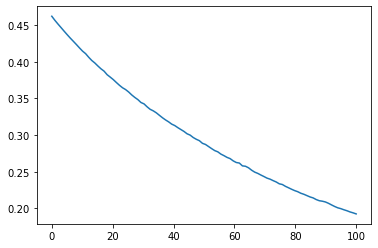

In [208]:
import matplotlib.pyplot as plt
import numpy as np

X_pts = np.linspace(0,100, len(hist.history['loss']))

plt.plot(X_pts, hist.history['loss'])

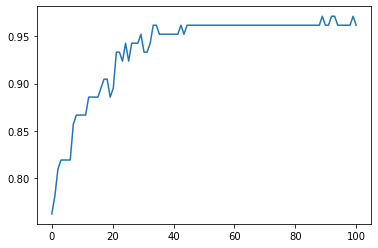

In [209]:
plt.plot(X_pts, hist.history['accuracy'])

5. 모형의 성능을 평가한다.
    - 모형에 대해 **evaluate** 함수를 이용하여 평가를 수행한다. 반환되는 결과는 손실값과 정확도가 항목인 튜플이다.

In [210]:
loss, acc = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.2264 - accuracy: 0.9778


In [211]:
print("손실값 :", round(loss, 3))
print("정확도 :", round(acc, 3))

손실값 : 0.226
정확도 : 0.978


6. 임의의 데이터에 대해서 모형의 출력을 확인한다.
    - 최종 시험용 데이터 집합이 별도로 존재하는 경우에는 그 데이터를 이용하여 출력을 확인하면 된다.
    - 별도의 시험용 데이터가 없는 경우, 검증 데이터(X_test, y_test)를 사용하거나 임의로 데이터를 직접 생성하여 출력을 확인해 볼 수 있다.

In [212]:
from numpy.random import random
from numpy import round

X_new = round(random([3,4])*10, 2)
print(X_new)

[[6.38 5.51 9.92 1.18]
 [8.69 7.28 3.41 2.58]
 [5.55 7.26 3.8  3.88]]


- 모형에 대해 **predict** 함수를 이용하여 새로운 데이터에 대한 출력을 수행한다.  
  이 때의 결과는 출력층의 활성화함수에 의해 추정된 확률(소프트맥스 점수)이다.

In [213]:
# 출력층의 활성화 함수에 의해 추정된 확률(소프트맥스 점수)
y_pred = model.predict(X_new)
print(y_pred)

[[8.4396015e-06 7.6001741e-02 9.2398983e-01]
 [7.2243649e-01 2.7748722e-01 7.6301432e-05]
 [2.1893868e-02 9.1346139e-01 6.4644761e-02]]


- 모형에 대해 **predict_classes** 함수를 이용하여 새로운 데이터에 대한 출력을 수행한다. 이 때의 결과는 분류된 클래스(레이블)이다.

In [214]:
y_pred_class = model.predict_classes(X_new)
print(y_pred_class)

[2 0 1]


In [215]:
(model.predict(X_new) > 0.5).astype("int32")

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

# 실습

In [285]:
# MNIST
import sklearn.datasets as d

# load_ : 연습용 데이터
# make_ : 가상의 데이터
# fetch_ : 데이터 다운로드
mnist = d.fetch_openml('mnist_784', version=1)

In [286]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [287]:
X = mnist.data
y = mnist.target

In [288]:
X.shape # 픽셀크기 28*28 = 784

(70000, 784)

In [289]:
y.shape

(70000,)

In [290]:
import numpy as np

np.unique(y) # 문자열 형태로 되어있음

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [291]:
y = y.astype(np.int)

In [292]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

label = 5


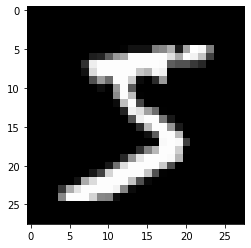

In [293]:
import matplotlib.pyplot as plt
%matplotlib inline

px = np.array(X[0], dtype='uint8').reshape((28,28))

plt.imshow(px, cmap='gray')
print('label =',y[0])

In [294]:
from keras.utils import to_categorical

y = to_categorical(y, 10) # one-hot encoding

In [295]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [296]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=20, input_dim=784, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

```python
from keras.optimizers import Adam -> 'adam' # 'adam' = 기본값으로 설정
```

In [297]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [298]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_28 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                160       
Total params: 16,175
Trainable params: 16,175
Non-trainable params: 0
_________________________________________________________________


In [311]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
490/490 - 0s - loss: 0.4115 - accuracy: 0.8818
Epoch 2/10
490/490 - 0s - loss: 0.4005 - accuracy: 0.8855
Epoch 3/10
490/490 - 0s - loss: 0.3910 - accuracy: 0.8892
Epoch 4/10
490/490 - 0s - loss: 0.3832 - accuracy: 0.8898
Epoch 5/10
490/490 - 0s - loss: 0.3671 - accuracy: 0.8962
Epoch 6/10
490/490 - 0s - loss: 0.3646 - accuracy: 0.8952
Epoch 7/10
490/490 - 0s - loss: 0.3564 - accuracy: 0.8983
Epoch 8/10
490/490 - 0s - loss: 0.3481 - accuracy: 0.9002
Epoch 9/10
490/490 - 0s - loss: 0.3432 - accuracy: 0.9013
Epoch 10/10
490/490 - 0s - loss: 0.3349 - accuracy: 0.9028


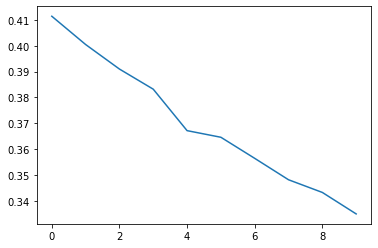

In [312]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(hist.history['loss'])

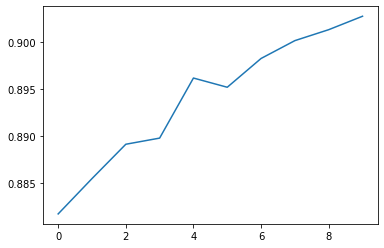

In [313]:
plt.plot(hist.history['accuracy'])

In [314]:
loss, acc = model.evaluate(X_test, y_test)

print('손실 =', loss)
print('정확 =', acc)

657/657 [==============================] - 0s 518us/step - loss: 0.4025 - accuracy: 0.8863
손실 = 0.40250730514526367
정확 = 0.8863333463668823


In [315]:
y_pred = model.predict(X_test)
y_pred_class = model.predict_classes(X_test)

In [316]:
y_pred[0:3]

array([[2.83600475e-05, 3.24337680e-06, 3.06145906e-01, 5.60904434e-03,
        1.17646260e-02, 9.46497824e-03, 6.50266647e-01, 2.41331145e-04,
        1.59667376e-02, 5.09103294e-04],
       [1.10275093e-02, 1.26665030e-02, 7.18020082e-01, 1.03983402e-01,
        2.85763945e-03, 1.11039868e-02, 1.20964935e-02, 3.73629443e-02,
        8.89098272e-02, 1.97159150e-03],
       [2.71876441e-08, 4.93471125e-05, 2.17189863e-02, 4.61872295e-02,
        1.80028292e-05, 8.71487355e-05, 2.30453992e-19, 9.31137979e-01,
        1.56083377e-06, 7.99764879e-04]], dtype=float32)

In [317]:
y_pred_class[0:3]

array([6, 2, 7], dtype=int64)

In [318]:
y_test[0:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [322]:
y_test_class = np.argmax(y_test, axis=1)

In [323]:
y_test_class [0:3]

array([6, 2, 7], dtype=int64)

In [324]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_class, y_pred_class))

[[1967    0   17    3    5    7   15   12   47    3]
 [   2 2307   20   10    3    2    3    9   28    6]
 [  18    5 1873   13   13    6   50   37  103    6]
 [   8    3   83 1752    2  154    2   42   99   20]
 [   3    2   12    0 1815    3   31    2   23  172]
 [ 135    6   11  100   29 1418   21   12  161   30]
 [  49    0   58    1   26   22 1815    0   28    0]
 [   6    1    9    7   17    1    2 2027   12   74]
 [  35   12   26    5   35   23   11   36 1849   16]
 [   3    2    0   25   58    7    1  135   35 1790]]


In [1]:
%%javascript
$.getScript('https://seareale.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>